<a href="https://colab.research.google.com/github/dmunozbe/TFM_DataScience/blob/main/TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargamos los datos


In [16]:
# Importamos las librerias necesarias
import requests
import pandas as pd

In [21]:
# Ruta de descarga de los archivos
path ="/content/datasets_descargados/"

In [22]:
def get_dataset(url, nombre_archivo):
  try:
    # Realizar la solicitud GET para descargar el archivo CSV
    respuesta = requests.get(url_csv)

    # Verificar si la solicitud fue exitosa (código de estado 200)
    if respuesta.status_code == 200:
    # Guardar el contenido del archivo en un archivo local
      with open(path + nombre_archivo, 'wb') as f:
        f.write(respuesta.content)
      print(f"El archivo CSV '{nombre_archivo}' ha sido descargado correctamente.")
    else:
      print("Error al descargar el archivo:", respuesta.status_code)

  except Exception as e:
        print("Error al descargar el CSV:", e)
        return None


In [23]:
# Llamamos a la funcion con la URL del dataset y el nombre del fichero con el que queremos guardarlo
get_dataset("https://opendata-ajuntament.barcelona.cat/data/dataset/10dd343a-e81a-4f1f-9f95-e21b1ee71dcc/resource/39b2fd23-da66-408e-804e-9f8c94dac23b/download","2023_atur_per_sexe.csv")

El archivo CSV '2023_atur_per_sexe.csv' ha sido descargado correctamente.


In [24]:
def cargar_csv(ruta):
    try:
        # Cargar el archivo CSV en un DataFrame de pandas
        dataframe = pd.read_csv(ruta)
        return dataframe
    except Exception as e:
        print("Error al cargar el archivo CSV:", e)
        return None

In [25]:
# Ruta al archivo CSV
ruta_csv = path + "2023_atur_per_sexe.csv"

# Llamar a la función para cargar el CSV
datos = cargar_csv(ruta_csv)

if datos is not None:
    # Hacer algo con los datos, por ejemplo, imprimir las primeras filas
    print("Primeras filas del DataFrame:")
    print(datos.head(15))

print(datos.describe())


datosDistrito=datos.groupby(['Nom_Districte','Any','Sexe'])
datosDistrito=datosDistrito['Nombre'].mean()
if datosDistrito is not None:
    # Hacer algo con los datos, por ejemplo, imprimir las primeras filas
    print("Primeras filas del DataFrame:")
    print(datosDistrito.head(50))


Primeras filas del DataFrame:
     Any  Mes  Codi_Districte   Nom_Districte  Codi_Barri  \
0   2023    1               1    Ciutat Vella           1   
1   2023    1               1    Ciutat Vella           2   
2   2023    1               1    Ciutat Vella           3   
3   2023    1               1    Ciutat Vella           4   
4   2023    1               2        Eixample           5   
5   2023    1               2        Eixample           6   
6   2023    1               2        Eixample           7   
7   2023    1               2        Eixample           8   
8   2023    1               2        Eixample           9   
9   2023    1               2        Eixample          10   
10  2023    1               3  Sants-Montjuïc          11   
11  2023    1               3  Sants-Montjuïc          12   
12  2023    1               3  Sants-Montjuïc          13   
13  2023    1               3  Sants-Montjuïc          14   
14  2023    1               3  Sants-Montjuïc          

In [ ]:
print(datos.describe())
conteo_valores = datos['Demanda_ocupacio'].value_counts()
print(conteo_valores)

          Any          Mes  Codi_Districte   Codi_Barri       Nombre
count  3552.0  3552.000000     3552.000000  3552.000000  3552.000000
mean   2023.0     6.500000        7.500000    37.837838   285.949887
std       0.0     3.452539       11.063117    22.121974   252.316807
min    2023.0     1.000000        1.000000     1.000000     2.000000
25%    2023.0     3.750000        4.000000    19.000000   103.000000
50%    2023.0     6.500000        7.000000    37.500000   215.000000
75%    2023.0     9.250000        8.000000    56.000000   411.250000
max    2023.0    12.000000       99.000000    99.000000  1548.000000
Atur Registrat        1776
Demanda No Aturats    1776
Name: Demanda_ocupacio, dtype: int64


## Datos

Información del shapefile:
  ID_ANNEX ANNEXDESCR ID_TEMA               TEMA_DESCR ID_CONJUNT  CONJ_DESCR  \
0       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
1       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
2       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
3       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
4       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
5       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
6       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
7       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
8       01   Grup - I    0104  Unitats Administratives     010412  Districtes   
9       01   Grup - I    0104  Unitats Administratives     010412  Districtes   

  ID_SUBCONJ SCONJ_DESC  ID_ELEMENT           ELEM_DESCR  ... ESTIL_ID_V  \
0   0

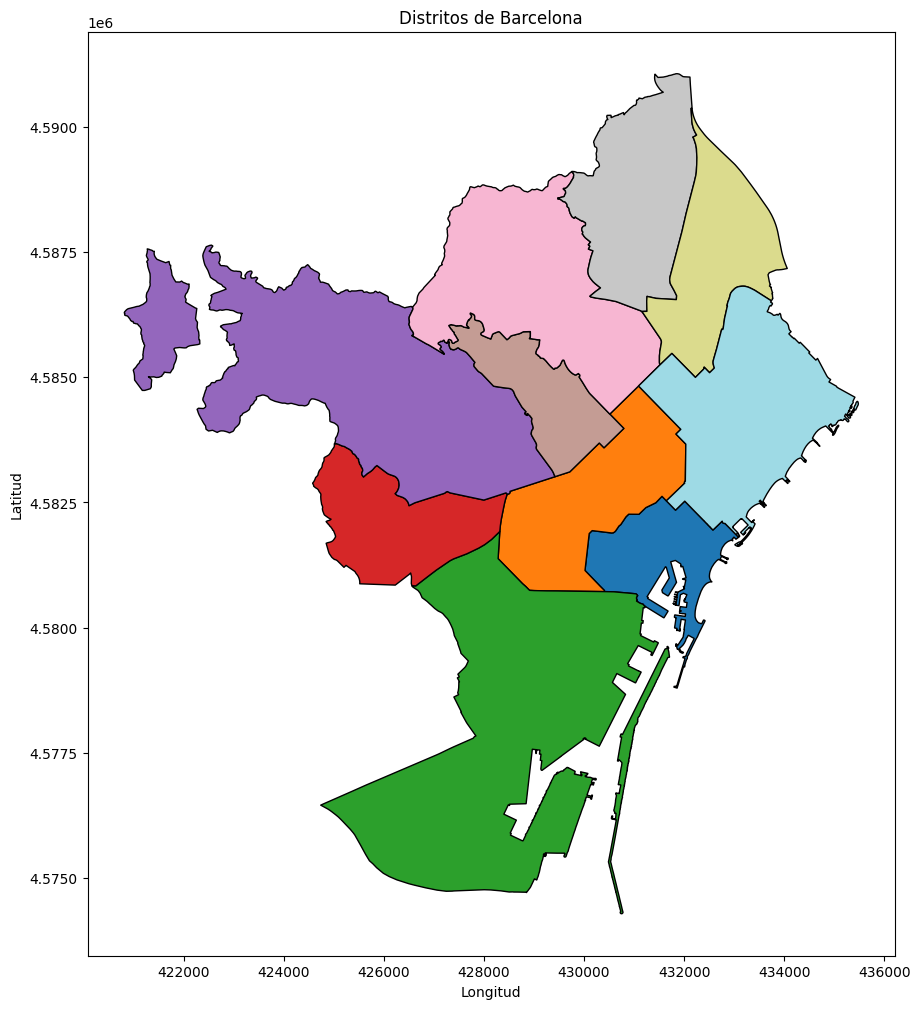

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el archivo shapefile de los distritos de Barcelona
barcelona_distritos = gpd.read_file("/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Grafo viario de las calles de la ciudad de Barcelona/BCN_UNITATS_ADM/0301040100_Districtes_UNITATS_ADM.shp")

# Mostrar información básica sobre el shapefile
print("Información del shapefile:")
print(barcelona_distritos.head(20))

# Visualizar el mapa de los distritos de Barcelona
barcelona_distritos.plot(figsize=(20, 12), edgecolor='black', cmap='tab20')
plt.title("Distritos de Barcelona")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()